In [1]:
import construction as cs
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp


import dynamic_metrics as ds


import matplotlib.pyplot as plt

### read font
from matplotlib import font_manager

font_dirs = ['Barlow/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

# set font
plt.rcParams['font.family'] = 'Barlow'

import networkx as nx
%matplotlib inline
%config InlineBackend.figure_format = 'retina'




%load_ext autoreload
%autoreload 2

In [2]:
def load_origin_graph(file_name,gap=299):
    data_in = cs.load_data("../Datasets/"+file_name+".dat")
    gap = 299 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_ETNgen_graph(file_name):
    data_in = cs.load_data("../Generated_graphs/ETNgen-"+file_name+".dat")
    gap = 299 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_dym_graph(file_name):
    data_in = cs.load_data("../Competitors_generated_graphs/Dymond/"+file_name+"_dym.dat")
    gap = 0 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_tag_graph(file_name):
    data_in = cs.load_data("../Competitors_generated_graphs/TagGen/"+file_name+"_generato_TagGen.dat")
    gap = 0 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

def load_stm_graph(file_name):
    data_in = cs.load_data("../Competitors_generated_graphs/STM/"+file_name+"_STM.dat")
    gap = 0 
    graphs_in = cs.build_graphs(data_in,gap=gap)
    return graphs_in

In [46]:
file_name = "High_School11"
orig_graphs = load_origin_graph(file_name,gap=299)
etn_gen = load_ETNgen_graph(file_name)
dym_gen = load_dym_graph(file_name)
tag_gen = load_tag_graph(file_name)
stm_gen = load_stm_graph(file_name)

In [47]:
import os

path = "dynamic_results/"+file_name
COV = path+"/coverage"
MFPTs = path+"/MFPT"

if not os.path.exists(path):
    os.makedirs(path)
    os.makedirs(COV)
    os.makedirs(MFPTs)

# coverage

k volte, con n0 e t0 random

In [48]:
from scipy.stats import ks_2samp

In [49]:
K = 1000
T = 500
c_stm = ds.coverage(stm_gen,K,T)
c_orig = ds.coverage(orig_graphs,K,T)
c_stab = ds.coverage(orig_graphs,K,T)
c_mio = ds.coverage(etn_gen,K,T)
c_tag = ds.coverage(tag_gen,K,T)
c_dym = ds.coverage(dym_gen,K,T)
c_stm = ds.coverage(stm_gen,K,T)

print("coverage")
print("orig vs sta \t",ks_2samp(c_orig, c_stab)[0])
print("orig vs etn \t",ks_2samp(c_orig, c_mio)[0])
print("orig vs tag \t",ks_2samp(c_orig, c_tag)[0])
print("orig vs dym \t",ks_2samp(c_orig, c_dym)[0])
print("orig vs stm \t",ks_2samp(c_orig, c_stm)[0])

np.save(COV+"/stab",c_stab)
np.save(COV+"/orig",c_orig)
np.save(COV+"/tag",c_tag)
np.save(COV+"/etn",c_mio)
np.save(COV+"/dym",c_dym)
np.save(COV+"/stm",c_stm)

coverage
orig vs sta 	 0.044
orig vs etn 	 0.501
orig vs tag 	 1.0
orig vs dym 	 0.453
orig vs stm 	 0.524


# MFPT

In [108]:
file_name = "LH10"
path = "dynamic_results/"+file_name
MFPTs = path+"/MFPT"

orig_graphs = load_origin_graph(file_name,gap=299)
etn_gen = load_ETNgen_graph(file_name)
dym_gen = load_dym_graph(file_name)
tag_gen = load_tag_graph(file_name)
stm_gen = load_stm_graph(file_name)
print(MFPTs)

dynamic_results/LH10/MFPT


In [109]:
K = 1
m_ori = ds.MFPT(orig_graphs,K)
print(1)
m_stb = ds.MFPT(orig_graphs,K)
print(2)
m_etn = ds.MFPT(etn_gen,K)
print(3)
m_dym = ds.MFPT(dym_gen,K)
print(4)
m_stm = ds.MFPT(stm_gen,K)
print(5)
m_tag = ds.MFPT(tag_gen,K)
print(6)

1
2
3
4
5
6


In [110]:
m_ori2 = [x for x in m_ori if x < max(m_ori)-10]
m_stb2 = [x for x in m_stb if x < max(m_ori)-10]
m_etn2 = [x for x in m_etn if x < max(m_ori)-10]
m_tag2 = [x for x in m_tag if x < max(m_ori)-10]
m_dym2 = [x for x in m_dym if x < max(m_ori)-10]
m_stm2 = [x for x in m_stm if x < max(m_ori)-10]

In [111]:
print("MFPS")
print("orig vs sta \t",ks_2samp(m_ori2, m_stb2)[0])
print("orig vs etn \t",ks_2samp(m_ori2, m_etn2)[0])
print("orig vs tag \t",ks_2samp(m_ori2, m_tag2)[0])
print("orig vs dym \t",ks_2samp(m_ori2, m_dym2)[0])
print("orig vs stm \t",ks_2samp(m_ori2, m_stm2)[0])


np.save(MFPTs+"/stab",m_stb2)
np.save(MFPTs+"/orig",m_ori2)
np.save(MFPTs+"/tag",m_tag2)
np.save(MFPTs+"/etn",m_etn2)
np.save(MFPTs+"/dym",m_dym2)
np.save(MFPTs+"/stm",m_stm2)

MFPS
orig vs sta 	 0.014228015421332844
orig vs etn 	 0.08135856506387812
orig vs tag 	 0.4048540320727837
orig vs dym 	 0.3775115594787726
orig vs stm 	 0.3064436865074999


# SIR model

In [129]:
import os
file_name = "High_School11"

path = "dynamic_results/"+file_name
R0 = path+"/R0/"
la025 = R0+"la025"
la015 = R0+"la015"
la001 = R0+"la001"
if not os.path.exists(la001):
    os.makedirs(la025)
    os.makedirs(la015)
    os.makedirs(la001)
    

In [130]:
orig_graphs = load_origin_graph(file_name,gap=299)
etn_gen = load_ETNgen_graph(file_name)
dym_gen = load_dym_graph(file_name)
tag_gen = load_tag_graph(file_name)
stm_gen = load_stm_graph(file_name)

In [131]:
for lambd in [0.25,0.15,0.01]:
    
    if lambd == 0.25:
        la = la025
    if lambd == 0.15:
        la = la015
    if lambd == 0.01:
        la = la001
        
    K = 100
    mu = 0.005
    
    print("R0 lambda",lambd,la)
    r_ori = ds.compute_r0(K,orig_graphs,lambd,mu)
    r_sta = ds.compute_r0(K,orig_graphs,lambd,mu)
    r_etn = ds.compute_r0(K,etn_gen,lambd,mu)
    r_stm = ds.compute_r0(K,stm_gen,lambd,mu)
    r_tag = ds.compute_r0(K,tag_gen,lambd,mu)
    r_dym = ds.compute_r0(K,dym_gen,lambd,mu)
    
    print("orig vs sta \t",ks_2samp(r_ori, r_sta)[0])
    print("orig vs etn \t",ks_2samp(r_ori, r_etn)[0])
    print("orig vs stm \t",ks_2samp(r_ori, r_stm)[0])
    print("orig vs tag \t",ks_2samp(r_ori, r_tag)[0])
    print("orig vs dym \t",ks_2samp(r_ori, r_dym)[0])

    np.save(la+"/stab",r_sta)
    np.save(la+"/orig",r_ori)
    np.save(la+"/tag",r_tag)
    np.save(la+"/etn",r_etn)
    np.save(la+"/dym",r_dym)
    np.save(la+"/stm",r_stm)

R0 lambda 0.25 dynamic_results/High_School11/R0/la025
orig vs sta 	 0.18
orig vs etn 	 0.16
orig vs stm 	 0.81
orig vs tag 	 0.44
orig vs dym 	 0.85
R0 lambda 0.15 dynamic_results/High_School11/R0/la015
orig vs sta 	 0.12
orig vs etn 	 0.19
orig vs stm 	 0.64
orig vs tag 	 0.5
orig vs dym 	 0.78
R0 lambda 0.01 dynamic_results/High_School11/R0/la001
orig vs sta 	 0.08
orig vs etn 	 0.17
orig vs stm 	 0.07
orig vs tag 	 0.71
orig vs dym 	 0.41


# plot

In [9]:
ORIGINAL_COLOR = "#4C4C4C"
ETN_COLOR = "#5100FF"
STM_COLOR = "#FF6A74"
TAG_COLOR = "#63CA82"
DYM_COLOR = "#FFD579"



ORIGINAL_COLOR = "#020005"
ETN_COLOR = "#ffb000" 
STM_COLOR = "#762f22"
TAG_COLOR = "#f3e79d"
DYM_COLOR = "#785478"#"#503850"

    
ORIGINAL_COLOR = "#020005"
ETN_COLOR = "#20639b" 
STM_COLOR = "#3caea3"
TAG_COLOR = "#f6d55c"
DYM_COLOR = "#ed553b"



ORIGINAL_COLOR = "#020005"
ETN_COLOR = "#F3AA20" 
STM_COLOR = "#2A445E" 
TAG_COLOR = "#841E62"
DYM_COLOR = "#346B6D"




In [10]:
def load_cov(file_name):
    
    ori = np.load("dynamic_results/"+file_name+"/coverage/orig.npy")
    stb = np.load("dynamic_results/"+file_name+"/coverage/stab.npy")
    etn = np.load("dynamic_results/"+file_name+"/coverage/etn.npy")
    tag = np.load("dynamic_results/"+file_name+"/coverage/tag.npy")
    stm = np.load("dynamic_results/"+file_name+"/coverage/stm.npy")
    dym = np.load("dynamic_results/"+file_name+"/coverage/dym.npy")
    
    return ori,stb,etn,tag,stm,dym

def load_mfpt(file_name):
    
    ori = np.load("dynamic_results/"+file_name+"/MFPT/orig.npy")
    stb = np.load("dynamic_results/"+file_name+"/MFPT/stab.npy")
    etn = np.load("dynamic_results/"+file_name+"/MFPT/etn.npy")
    tag = np.load("dynamic_results/"+file_name+"/MFPT/tag.npy")
    stm = np.load("dynamic_results/"+file_name+"/MFPT/stm.npy")
    dym = np.load("dynamic_results/"+file_name+"/MFPT/dym.npy")
    
    return ori,stb,etn,tag,stm,dym

def load_r0(file_name,lambd="la001"):
    
    ori = np.load("dynamic_results/"+file_name+"/R0/"+lambd+"/orig.npy")
    stb = np.load("dynamic_results/"+file_name+"/R0/"+lambd+"/stab.npy")
    etn = np.load("dynamic_results/"+file_name+"/R0/"+lambd+"/etn.npy")
    tag = np.load("dynamic_results/"+file_name+"/R0/"+lambd+"/tag.npy")
    stm = np.load("dynamic_results/"+file_name+"/R0/"+lambd+"/stm.npy")
    dym = np.load("dynamic_results/"+file_name+"/R0/"+lambd+"/dym.npy")
    
    return ori,stb,etn,tag,stm,dym

In [11]:
file_name = "LH10"
cov = load_cov(file_name)
mfpt = load_mfpt(file_name)
ro_025 = load_r0(file_name,"la025")
ro_015 = load_r0(file_name,"la015")
ro_001 = load_r0(file_name,"la001")

In [12]:

from matplotlib.patches import Patch
from matplotlib.lines import Line2D

def compute_ks_cov_mfpt(cov,mfpt):
    orig_c = cov[0]
    orig_m = mfpt[0]
    res = []
    for i in range(len(cov)-1):
        i = i+1
        ks_c = ks_2samp(orig_c, cov[i])[0]
        ks_m = ks_2samp(orig_m, mfpt[i])[0]
        res.append([ks_c,ks_m])
        
    return res


def plot_cov_mfpt(ax,file_name,legend=False):
    ax.set_title(file_name)
    cov = load_cov(file_name)
    mfpt = load_mfpt(file_name)
    x = np.arange(2)
    x1,x2,x3,x4,x5 = compute_ks_cov_mfpt(cov,mfpt)
    width = 0.2
    rects1 = ax.bar(x - 0.3, x2, width, label='ETN-gen',color=ETN_COLOR)
    rects4 = ax.bar(x - 0.1, x3, width, label='STM',color=STM_COLOR)
    rects5 = ax.bar(x + 0.1, x5, width, label='TagGen',color=TAG_COLOR)
    rects4 = ax.bar(x + 0.3 , x4, width, label='Dymond',color=DYM_COLOR)
    ax.plot([-0.45,0.45],[x1[0],x1[0]],"--",linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    ax.plot([1-0.45,1.45],[x1[1],x1[1]],"--",linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    
              
    ax.tick_params(bottom=False, right=False,left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#FFFFFF')
    ax.set_facecolor('#EFEFEF')
    ax.xaxis.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')    
    
    labels = ["Coverage","MFPT"]
    ax.set_xticks(x)
    ax.set_xticklabels(labels,rotation=0)
    ax.set_ylim((0,1))
    
def plot_r0(ax,file_name,legend=False):
    ax.set_title(file_name)
    r0_025 = load_r0(file_name,"la025")
    r0_015 = load_r0(file_name,"la015")
    r0_001 = load_r0(file_name,"la001")
    x1,x2,x3,x4,x5 = compute_ks_r0(r0_025,r0_015,r0_001)
    x = np.arange(3)
    width = 0.2
    rects1 = ax.bar(x - 0.3, x2, width, label='ETN-gen',color=ETN_COLOR)
    rects4 = ax.bar(x - 0.1, x3, width, label='STM',color=STM_COLOR)
    rects5 = ax.bar(x + 0.1, x5, width, label='TagGen',color=TAG_COLOR)
    rects4 = ax.bar(x + 0.3 , x4, width, label='Dymond',color=DYM_COLOR)
    
    ax.plot([-0.45,0.45],[x1[0],x1[0]],"--",linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    ax.plot([1-0.45,1.45],[x1[1],x1[1]],"--",linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    ax.plot([2-0.45,2.45],[x1[2],x1[2]],"--",linewidth=3, label='Stability',color=ORIGINAL_COLOR)
    
          
    ax.tick_params(bottom=False, right=False,left=False)
    ax.set_axisbelow(True)
    ax.yaxis.grid(True, color='#FFFFFF')
    ax.set_facecolor('#EFEFEF')
    ax.xaxis.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('#DDDDDD')
    
    

    labels = [r"$\lambda$ = 0.25",r"$\lambda$ = 0.15",r"$\lambda$ = 0.01"]
    ax.set_xticks(x)
    ax.set_xticklabels(labels,rotation=0)
    ax.set_ylim((0,1))
    if legend:


        legend_elements = [Line2D([0], [0], color=ORIGINAL_COLOR, lw=3,ls="--",label='Original'),
                           Patch(facecolor=ETN_COLOR, edgecolor=ETN_COLOR,label='ETN-Gen'),
                           Patch(facecolor=STM_COLOR, edgecolor=STM_COLOR,label='STM'),
                           Patch(facecolor=TAG_COLOR, edgecolor=TAG_COLOR,label='TagGen'),
                           Patch(facecolor=DYM_COLOR, edgecolor=DYM_COLOR,label='Dymond')]

        # Create the figure
        ax.legend(handles=legend_elements,loc='center left', bbox_to_anchor=(-0.85, -0.25),ncol=5)



In [13]:
def compute_ks_r0(la25,la15,la01):
    orig_25 = la25[0]
    orig_15 = la15[0]
    orig_01 = la01[0]
    res = []
    for i in range(len(la25)-1):
        i = i+1
        ks_25 = ks_2samp(orig_25, la25[i])[0]
        ks_15 = ks_2samp(orig_15, la15[i])[0]
        ks_01 = ks_2samp(orig_01, la01[i])[0]
        res.append([ks_25,ks_15,ks_01])
        
    return res


In [17]:
ORIGINAL_COLOR = "#020005"
ETN_COLOR = "#F3AA20" 
STM_COLOR = "#2A445E" 
TAG_COLOR = "#841E62"
DYM_COLOR = "#346B6D"


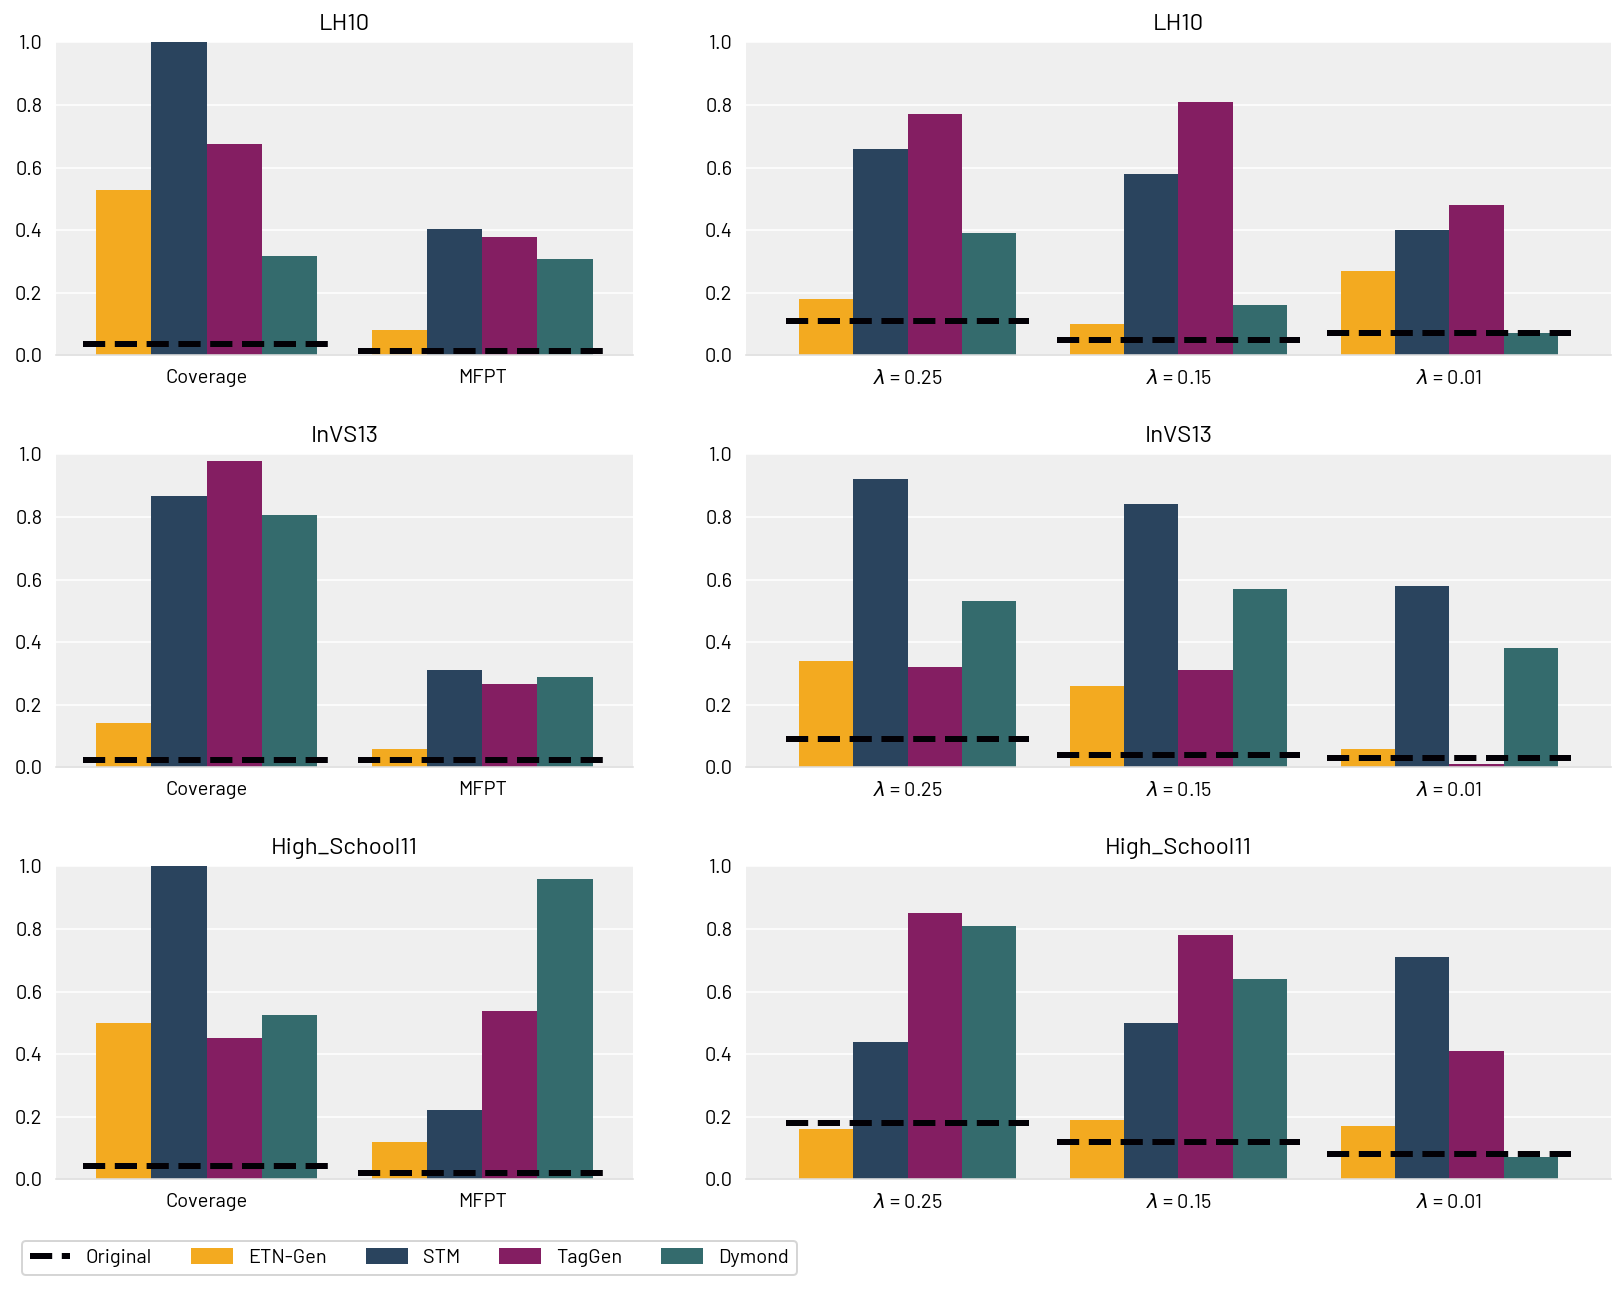

In [18]:
fig, ax = plt.subplots(3,2, figsize=(12,9), gridspec_kw={'width_ratios': [2, 3]})
fig.tight_layout(pad=3.0)
plot_cov_mfpt(ax[0][0],"LH10")
plot_r0(ax[0][1],"LH10")

plot_cov_mfpt(ax[1][0],"InVS13")
plot_r0(ax[1][1],"InVS13")


plot_cov_mfpt(ax[2][0],"High_School11",legend=True)
plot_r0(ax[2][1],"High_School11",legend=True)

fig.savefig("dynamic_main_test.pdf", bbox_inches = 'tight')